<a href="https://colab.research.google.com/github/parthkhanzode/Infosys-Milestone-1/blob/main/Milestone_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
!pip install pandas matplotlib seaborn --quiet


In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
from google.colab import files
uploaded=files.upload()
print(uploaded)

Saving staff.csv to staff.csv
Saving staff_schedule.csv to staff_schedule.csv
{'staff.csv': b'staff_id,staff_name,role,service\nSTF-5ca26577,Allison Hill,doctor,emergency\nSTF-02ae59ca,Noah Rhodes,doctor,emergency\nSTF-d8006e7c,Angie Henderson,doctor,emergency\nSTF-212d8b31,Daniel Wagner,doctor,emergency\nSTF-107a58e4,Cristian Santos,doctor,emergency\nSTF-ca932dea,Connie Lawrence,nurse,emergency\nSTF-39082289,Abigail Shaffer,nurse,emergency\nSTF-702887af,Gina Moore,nurse,emergency\nSTF-249f63bb,Gabrielle Davis,nurse,emergency\nSTF-094f410b,Ryan Munoz,nurse,emergency\nSTF-d7ab0c23,Monica Herrera,nurse,emergency\nSTF-e51bdcb4,Jamie Arnold,nurse,emergency\nSTF-8cabb71f,Lisa Hensley,nurse,emergency\nSTF-34c0563d,Michele Williams,nurse,emergency\nSTF-130577e6,Dylan Miller,nurse,emergency\nSTF-768c9d6f,Brian Ramirez,nurse,emergency\nSTF-abec8336,Holly Wood,nurse,emergency\nSTF-6f6535f8,Derek Zuniga,nurse,emergency\nSTF-b4fb711c,Lisa Jackson,nurse,emergency\nSTF-434f45a6,Carla Gray,nurse,emer

In [5]:
staff = pd.read_csv('/content/staff.csv')
schedule = pd.read_csv('/content/staff_schedule.csv')

In [7]:
print("Data Loaded Successfully\n")
print("Staff Data Shape:", staff.shape)
print("Schedule Data Shape:", schedule.shape)

Data Loaded Successfully

Staff Data Shape: (110, 4)
Schedule Data Shape: (6552, 6)


In [8]:
display(staff.head())
display(schedule.head())

,staff_id,staff_name,role,service
0,STF-5ca26577,Allison Hill,doctor,emergency
1,STF-02ae59ca,Noah Rhodes,doctor,emergency
2,STF-d8006e7c,Angie Henderson,doctor,emergency
3,STF-212d8b31,Daniel Wagner,doctor,emergency
4,STF-107a58e4,Cristian Santos,doctor,emergency


,week,staff_id,staff_name,role,service,present
0,1,STF-b77cdc60,Allison Hill,doctor,emergency,1
1,2,STF-b77cdc60,Allison Hill,doctor,emergency,1
2,3,STF-b77cdc60,Allison Hill,doctor,emergency,0
3,4,STF-b77cdc60,Allison Hill,doctor,emergency,1
4,5,STF-b77cdc60,Allison Hill,doctor,emergency,1


In [9]:
print("\nMissing values in staff:\n", staff.isnull().sum())
print("\nMissing values in schedule:\n", schedule.isnull().sum())


Missing values in staff:
 staff_id      0
staff_name    0
role          0
service       0
dtype: int64

Missing values in schedule:
 week          0
staff_id      0
staff_name    0
role          0
service       0
present       0
dtype: int64


In [10]:
print("\nDuplicates in staff:", staff.duplicated().sum())
print("Duplicates in schedule:", schedule.duplicated().sum())


Duplicates in staff: 0
Duplicates in schedule: 0


In [11]:
staff = staff.drop_duplicates()
schedule = schedule.drop_duplicates()

In [12]:
staff.fillna(staff.median(numeric_only=True), inplace=True)
schedule.fillna(schedule.median(numeric_only=True), inplace=True)

In [13]:
for col in staff.select_dtypes('object').columns:
    staff[col].fillna(staff[col].mode()[0], inplace=True)


/tmp/ipython-input-3529733025.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  staff[col].fillna(staff[col].mode()[0], inplace=True)


In [14]:
for col in schedule.select_dtypes('object').columns:
    schedule[col].fillna(schedule[col].mode()[0], inplace=True)

/tmp/ipython-input-3828954357.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  schedule[col].fillna(schedule[col].mode()[0], inplace=True)


In [15]:
print("\n Data cleaned successfully!")


 Data cleaned successfully!


In [16]:
print("\nData Types Before:\n", staff.dtypes)
print("\nData Types Before:\n", schedule.dtypes)


Data Types Before:
 staff_id      object
staff_name    object
role          object
service       object
dtype: object

Data Types Before:
 week           int64
staff_id      object
staff_name    object
role          object
service       object
present        int64
dtype: object


In [17]:
for col in staff.columns:
    if 'date' in col.lower() or 'time' in col.lower():
        staff[col] = pd.to_datetime(staff[col], errors='ignore')

In [18]:
for col in schedule.columns:
    if 'date' in col.lower() or 'time' in col.lower():
        schedule[col] = pd.to_datetime(schedule[col], errors='ignore')

In [49]:
common_key = 'staff_id' if 'staff_id' in staff.columns else staff.columns[0]

In [50]:
merged = pd.merge(staff, schedule, on=common_key, how='inner')
print("\n Merged dataset created successfully!")
print("Merged Shape:", merged.shape)
display(merged.head())


 Merged dataset created successfully!
Merged Shape: (0, 9)


,staff_id,staff_name_x,role_x,service_x,week,staff_name_y,role_y,service_y,present


In [51]:
print("\nSummary Statistics:\n")
display(merged.describe(include='all'))


Summary Statistics:



,staff_id,staff_name_x,role_x,service_x,week,staff_name_y,role_y,service_y,present
count,0,0,0,0,0.0,0,0,0,0.0
unique,0,0,0,0,NaN,0,0,0,NaN
top,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
std,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
75%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [52]:
print("\nCorrelation Matrix:\n")
display(merged.corr(numeric_only=True))


Correlation Matrix:



,week,present
week,NaN,NaN
present,NaN,NaN


In [53]:
sns.set(style='whitegrid')

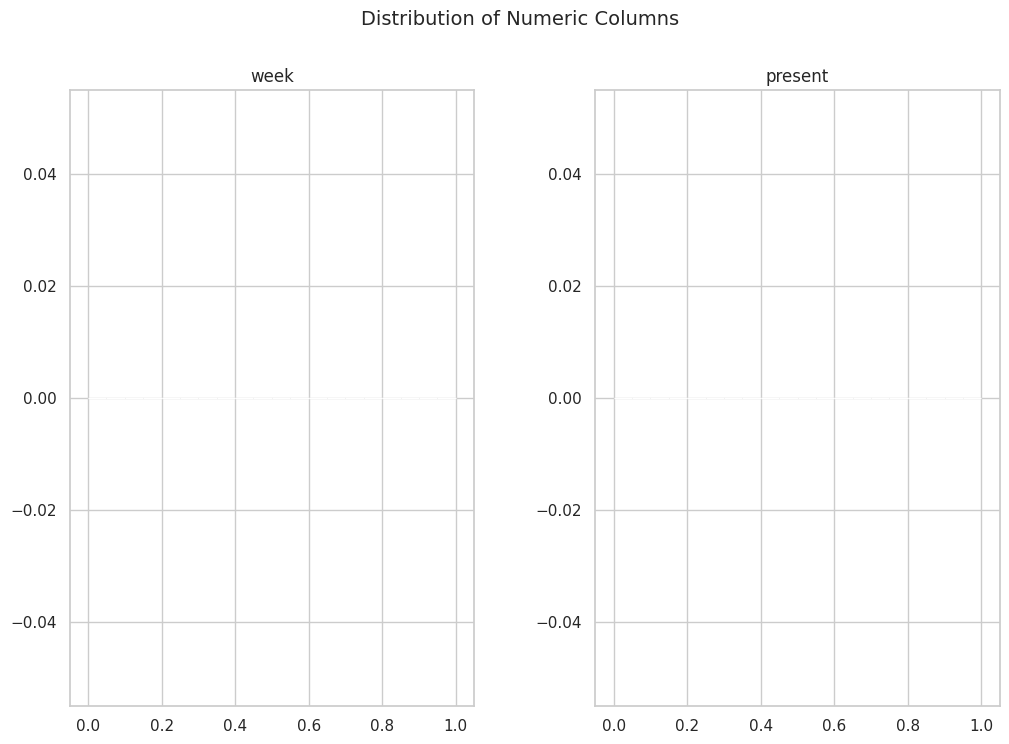

In [54]:
merged.hist(figsize=(12,8), bins=20)
plt.suptitle("Distribution of Numeric Columns", fontsize=14)
plt.show()

/usr/local/lib/python3.12/dist-packages/seaborn/matrix.py:202: RuntimeWarning: All-NaN slice encountered
  vmin = np.nanmin(calc_data)
/usr/local/lib/python3.12/dist-packages/seaborn/matrix.py:207: RuntimeWarning: All-NaN slice encountered
  vmax = np.nanmax(calc_data)


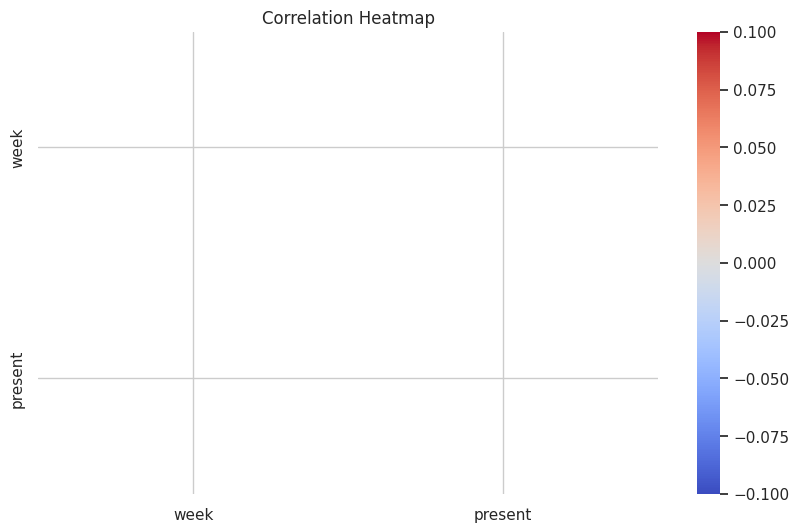

In [55]:
plt.figure(figsize=(10,6))
sns.heatmap(merged.corr(numeric_only=True), annot=True, cmap='coolwarm')
plt.title("Correlation Heatmap")
plt.show()

In [57]:
if 'Department' in merged.columns:
    plt.figure(figsize=(8,4))
    sns.countplot(data=merged, x='Department', palette='Set2')
    plt.title("Count of Staff by Department")
    plt.xticks(rotation=45)
    plt.show()


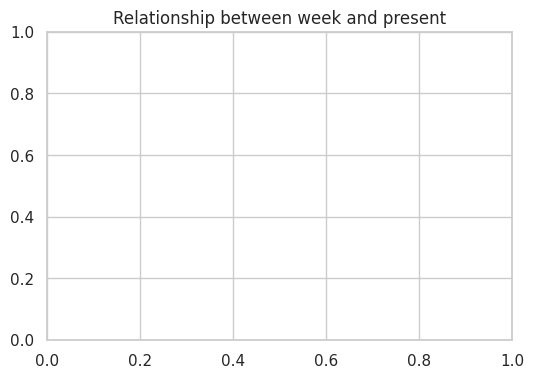

In [58]:
num_cols = merged.select_dtypes(include='number').columns.tolist()
if len(num_cols) >= 2:
    plt.figure(figsize=(6,4))
    sns.scatterplot(data=merged, x=num_cols[0], y=num_cols[1], hue=merged.columns[0])
    plt.title(f"Relationship between {num_cols[0]} and {num_cols[1]}")
    plt.show()

In [59]:
merged.to_csv('/content/drive/MyDrive/StudyTrack_AI_StudentRecommender/Milestone1/cleaned_merged_staff.csv', index=False)
print("\n Cleaned & merged dataset saved successfully!")

OSError: Cannot save file into a non-existent directory: '/content/drive/MyDrive/StudyTrack_AI_StudentRecommender/Milestone1'